In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import os
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [9]:
cd ../data

/Users/marijansoric/Documents/GitHub/Solar-Energy-Production-Forecasting/data


# Data Import :

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
cd drive/MyDrive/Solar-Energy-Prediction-ML-Project-NTNU/data

[Errno 2] No such file or directory: 'drive/MyDrive/Solar-Energy-Prediction-ML-Project-NTNU/data'
/content/drive/MyDrive/Solar-Energy-Prediction-ML-Project-NTNU/data


In [10]:
X_train_estimated_a = pd.read_parquet('A/X_train_estimated.parquet')
X_train_observed_a = pd.read_parquet('A/X_train_observed.parquet')
X_test_estimated_a = pd.read_parquet('A/X_test_estimated.parquet')
train_a = pd.read_parquet('A/train_targets.parquet')

X_train_estimated_b = pd.read_parquet('B/X_train_estimated.parquet')
X_train_observed_b = pd.read_parquet('B/X_train_observed.parquet')
X_test_estimated_b = pd.read_parquet('B/X_test_estimated.parquet')
train_b = pd.read_parquet('B/train_targets.parquet')

X_train_estimated_c = pd.read_parquet('C/X_train_estimated.parquet')
X_train_observed_c = pd.read_parquet('C/X_train_observed.parquet')
X_test_estimated_c = pd.read_parquet('C/X_test_estimated.parquet')
train_c = pd.read_parquet('C/train_targets.parquet')

In [11]:
X_train_estimated_a.set_index('date_forecast', inplace = True)
X_train_observed_a.set_index('date_forecast', inplace = True)
X_test_estimated_a.set_index('date_forecast', inplace = True)

X_train_estimated_b.set_index('date_forecast', inplace = True)
X_train_observed_b.set_index('date_forecast', inplace = True)
X_test_estimated_b.set_index('date_forecast', inplace = True)

X_train_estimated_c.set_index('date_forecast', inplace = True)
X_train_observed_c.set_index('date_forecast', inplace = True)
X_test_estimated_c.set_index('date_forecast', inplace = True)


X_train_estimated_a.drop('date_calc', axis=1, inplace=True)
X_test_estimated_a.drop('date_calc', axis=1, inplace=True)

X_train_estimated_b.drop('date_calc', axis=1, inplace=True)
X_test_estimated_b.drop('date_calc', axis=1, inplace=True)

X_train_estimated_c.drop('date_calc', axis=1, inplace=True)
X_test_estimated_c.drop('date_calc', axis=1, inplace=True)


train_a.set_index('time', inplace = True)
train_b.set_index('time', inplace = True)
train_c.set_index('time', inplace = True)

train_a.dropna(inplace = True)
train_b.dropna(inplace = True)
train_c.dropna(inplace = True)

In [12]:
X_train_estimated_a = X_train_estimated_a.loc[X_train_estimated_a.index[::4]]
X_train_observed_a = X_train_observed_a.loc[X_train_observed_a.index[::4]]
X_test_estimated_a = X_test_estimated_a.loc[X_test_estimated_a.index[::4]]


X_train_estimated_b = X_train_estimated_b.loc[X_train_estimated_b.index[::4]]
X_train_observed_b = X_train_observed_b.loc[X_train_observed_b.index[::4]]
X_test_estimated_b = X_test_estimated_b.loc[X_test_estimated_b.index[::4]]

X_train_estimated_c = X_train_estimated_c.loc[X_train_estimated_c.index[::4]]
X_train_observed_c = X_train_observed_c.loc[X_train_observed_c.index[::4]]
X_test_estimated_c = X_test_estimated_c.loc[X_test_estimated_c.index[::4]]

In [13]:
#We match the sizes of X and Y
#We keep the measurements from every hour only
intersection_index_estimated_a = X_train_estimated_a.index.intersection(train_a.index)
intersection_index_estimated_b = X_train_estimated_b.index.intersection(train_b.index)
intersection_index_estimated_c = X_train_estimated_c.index.intersection(train_c.index)

intersection_index_observed_a = X_train_observed_a.index.intersection(train_a.index)
intersection_index_observed_b = X_train_observed_b.index.intersection(train_b.index)
intersection_index_observed_c = X_train_observed_c.index.intersection(train_c.index)


X_train_estimated_a = X_train_estimated_a.loc[intersection_index_estimated_a]
X_train_estimated_b = X_train_estimated_b.loc[intersection_index_estimated_b]
X_train_estimated_c = X_train_estimated_c.loc[intersection_index_estimated_c]


X_train_observed_a = X_train_observed_a.loc[intersection_index_observed_a]
X_train_observed_b = X_train_observed_b.loc[intersection_index_observed_b]
X_train_observed_c = X_train_observed_c.loc[intersection_index_observed_c]


train_a_estimated = train_a.loc[intersection_index_estimated_a]
train_b_estimated = train_b.loc[intersection_index_estimated_b]
train_c_estimated = train_c.loc[intersection_index_estimated_c]

train_a_observed = train_a.loc[intersection_index_observed_a]
train_b_observed = train_b.loc[intersection_index_observed_b]
train_c_observed = train_c.loc[intersection_index_observed_c]

In [14]:
A_index20 = X_train_observed_a.loc['2020-05-01 00:00:00':'2020-07-03 23:45:00'].index
A_index21 = X_train_observed_a.loc['2021-05-01 00:00:00':'2021-07-03 23:45:00'].index
A_index22 = X_train_observed_a.loc['2022-05-01 00:00:00':'2022-07-03 23:45:00'].index

B_index19 = X_train_observed_b.loc['2019-05-01 00:00:00':'2019-07-03 23:45:00'].index
B_index20 = X_train_observed_b.loc['2020-05-01 00:00:00':'2020-07-03 23:45:00'].index
B_index21 = X_train_observed_b.loc['2021-05-01 00:00:00':'2021-07-03 23:45:00'].index

C_index20 = X_train_observed_c.loc['2020-05-01 00:00:00':'2020-07-03 23:45:00'].index
C_index21 = X_train_observed_c.loc['2021-05-01 00:00:00':'2021-07-03 23:45:00'].index

A_index_spring = A_index20.union(A_index21).union(A_index22)
B_index_spring = B_index19.union(B_index20).union(B_index21)
C_index_spring = C_index20.union(C_index21) 

X_train_observed_a = X_train_observed_a.loc[A_index_spring]
X_train_observed_b = X_train_observed_b.loc[B_index_spring]
X_train_observed_c = X_train_observed_c.loc[C_index_spring]

In [15]:
#We change the Time that is a string, to a variable in seconds
timestamp_s_observed_a = X_train_observed_a.index.map(pd.Timestamp.timestamp)
timestamp_s_observed_b = X_train_observed_b.index.map(pd.Timestamp.timestamp)
timestamp_s_observed_c = X_train_observed_c.index.map(pd.Timestamp.timestamp)

timestamp_s_estimated_a = X_train_estimated_a.index.map(pd.Timestamp.timestamp)
timestamp_s_estimated_b = X_train_estimated_b.index.map(pd.Timestamp.timestamp)
timestamp_s_estimated_c = X_train_estimated_c.index.map(pd.Timestamp.timestamp)

timestamp_s_test_a = X_test_estimated_a.index.map(pd.Timestamp.timestamp)
timestamp_s_test_b = X_test_estimated_b.index.map(pd.Timestamp.timestamp)
timestamp_s_test_c = X_test_estimated_c.index.map(pd.Timestamp.timestamp)

#Then, we incorporate the periodicity
day = 24*60*60
year = (365.2425)*day

X_train_observed_a['Day sin'] = np.sin(timestamp_s_observed_a * (2 * np.pi / day))
X_train_observed_a['Day cos'] = np.cos(timestamp_s_observed_a * (2 * np.pi / day))
X_train_observed_a['Year sin'] = np.sin(timestamp_s_observed_a * (2 * np.pi / year))
X_train_observed_a['Year cos'] = np.cos(timestamp_s_observed_a * (2 * np.pi / year))

X_train_observed_b['Day sin'] = np.sin(timestamp_s_observed_b * (2 * np.pi / day))
X_train_observed_b['Day cos'] = np.cos(timestamp_s_observed_b * (2 * np.pi / day))
X_train_observed_b['Year sin'] = np.sin(timestamp_s_observed_b * (2 * np.pi / year))
X_train_observed_b['Year cos'] = np.cos(timestamp_s_observed_b * (2 * np.pi / year))

X_train_observed_c['Day sin'] = np.sin(timestamp_s_observed_c * (2 * np.pi / day))
X_train_observed_c['Day cos'] = np.cos(timestamp_s_observed_c * (2 * np.pi / day))
X_train_observed_c['Year sin'] = np.sin(timestamp_s_observed_c * (2 * np.pi / year))
X_train_observed_c['Year cos'] = np.cos(timestamp_s_observed_c * (2 * np.pi / year))


X_train_estimated_a['Day sin'] = np.sin(timestamp_s_estimated_a * (2 * np.pi / day))
X_train_estimated_a['Day cos'] = np.cos(timestamp_s_estimated_a * (2 * np.pi / day))
X_train_estimated_a['Year sin'] = np.sin(timestamp_s_estimated_a * (2 * np.pi / year))
X_train_estimated_a['Year cos'] = np.cos(timestamp_s_estimated_a * (2 * np.pi / year))

X_train_estimated_b['Day sin'] = np.sin(timestamp_s_estimated_b * (2 * np.pi / day))
X_train_estimated_b['Day cos'] = np.cos(timestamp_s_estimated_b * (2 * np.pi / day))
X_train_estimated_b['Year sin'] = np.sin(timestamp_s_estimated_b * (2 * np.pi / year))
X_train_estimated_b['Year cos'] = np.cos(timestamp_s_estimated_b * (2 * np.pi / year))

X_train_estimated_c['Day sin'] = np.sin(timestamp_s_estimated_c * (2 * np.pi / day))
X_train_estimated_c['Day cos'] = np.cos(timestamp_s_estimated_c * (2 * np.pi / day))
X_train_estimated_c['Year sin'] = np.sin(timestamp_s_estimated_c * (2 * np.pi / year))
X_train_estimated_c['Year cos'] = np.cos(timestamp_s_estimated_c * (2 * np.pi / year))


X_test_estimated_a['Day sin'] = np.sin(timestamp_s_test_a * (2 * np.pi / day))
X_test_estimated_a['Day cos'] = np.cos(timestamp_s_test_a * (2 * np.pi / day))
X_test_estimated_a['Year sin'] = np.sin(timestamp_s_test_a * (2 * np.pi / year))
X_test_estimated_a['Year cos'] = np.cos(timestamp_s_test_a * (2 * np.pi / year))

X_test_estimated_b['Day sin'] = np.sin(timestamp_s_test_b * (2 * np.pi / day))
X_test_estimated_b['Day cos'] = np.cos(timestamp_s_test_b * (2 * np.pi / day))
X_test_estimated_b['Year sin'] = np.sin(timestamp_s_test_b * (2 * np.pi / year))
X_test_estimated_b['Year cos'] = np.cos(timestamp_s_test_b * (2 * np.pi / year))

X_test_estimated_c['Day sin'] = np.sin(timestamp_s_test_c * (2 * np.pi / day))
X_test_estimated_c['Day cos'] = np.cos(timestamp_s_test_c * (2 * np.pi / day))
X_test_estimated_c['Year sin'] = np.sin(timestamp_s_test_c * (2 * np.pi / year))
X_test_estimated_c['Year cos'] = np.cos(timestamp_s_test_c * (2 * np.pi / year))


In [16]:
#We change the sun_azimuth variable, because an angle in degree is not really comprehensible for the machine (0 and 360 should be the same)
#therefore, we introduce the sinus and cosinus features
X_train_observed_a['sun_azimuth_cos:'] = np.cos(X_train_observed_a['sun_azimuth:d'])
X_train_observed_a['sun_azimuth_sin:'] = np.sin(X_train_observed_a['sun_azimuth:d'])
X_train_estimated_a['sun_azimuth_cos:'] = np.cos(X_train_estimated_a['sun_azimuth:d'])
X_train_estimated_a['sun_azimuth_sin:'] = np.sin(X_train_estimated_a['sun_azimuth:d'])
X_test_estimated_a['sun_azimuth_cos:'] = np.cos(X_test_estimated_a['sun_azimuth:d'])
X_test_estimated_a['sun_azimuth_sin:'] = np.sin(X_test_estimated_a['sun_azimuth:d'])
X_train_observed_a.drop(['sun_azimuth:d'], axis = 1, inplace = True)
X_train_estimated_a.drop(['sun_azimuth:d'], axis = 1, inplace = True)
X_test_estimated_a.drop(['sun_azimuth:d'], axis = 1, inplace = True)


X_train_observed_b['sun_azimuth_cos:'] = np.cos(X_train_observed_b['sun_azimuth:d'])
X_train_observed_b['sun_azimuth_sin:'] = np.sin(X_train_observed_b['sun_azimuth:d'])
X_train_estimated_b['sun_azimuth_cos:'] = np.cos(X_train_estimated_b['sun_azimuth:d'])
X_train_estimated_b['sun_azimuth_sin:'] = np.sin(X_train_estimated_b['sun_azimuth:d'])
X_test_estimated_b['sun_azimuth_cos:'] = np.cos(X_test_estimated_b['sun_azimuth:d'])
X_test_estimated_b['sun_azimuth_sin:'] = np.sin(X_test_estimated_b['sun_azimuth:d'])
X_train_observed_b.drop(['sun_azimuth:d'], axis = 1, inplace = True)
X_train_estimated_b.drop(['sun_azimuth:d'], axis = 1, inplace = True)
X_test_estimated_b.drop(['sun_azimuth:d'], axis = 1, inplace = True)

X_train_observed_c['sun_azimuth_cos:'] = np.cos(X_train_observed_c['sun_azimuth:d'])
X_train_observed_c['sun_azimuth_sin:'] = np.sin(X_train_observed_c['sun_azimuth:d'])
X_train_estimated_c['sun_azimuth_cos:'] = np.cos(X_train_estimated_c['sun_azimuth:d'])
X_train_estimated_c['sun_azimuth_sin:'] = np.sin(X_train_estimated_c['sun_azimuth:d'])
X_test_estimated_c['sun_azimuth_cos:'] = np.cos(X_test_estimated_c['sun_azimuth:d'])
X_test_estimated_c['sun_azimuth_sin:'] = np.sin(X_test_estimated_c['sun_azimuth:d'])
X_train_observed_c.drop(['sun_azimuth:d'], axis = 1, inplace = True)
X_train_estimated_c.drop(['sun_azimuth:d'], axis = 1, inplace = True)
X_test_estimated_c.drop(['sun_azimuth:d'], axis = 1, inplace = True)

In [17]:
X_train_observed_a.columns

Index(['absolute_humidity_2m:gm3', 'air_density_2m:kgm3',
       'ceiling_height_agl:m', 'clear_sky_energy_1h:J', 'clear_sky_rad:W',
       'cloud_base_agl:m', 'dew_or_rime:idx', 'dew_point_2m:K',
       'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W', 'direct_rad_1h:J',
       'effective_cloud_cover:p', 'elevation:m', 'fresh_snow_12h:cm',
       'fresh_snow_1h:cm', 'fresh_snow_24h:cm', 'fresh_snow_3h:cm',
       'fresh_snow_6h:cm', 'is_day:idx', 'is_in_shadow:idx',
       'msl_pressure:hPa', 'precip_5min:mm', 'precip_type_5min:idx',
       'pressure_100m:hPa', 'pressure_50m:hPa', 'prob_rime:p',
       'rain_water:kgm2', 'relative_humidity_1000hPa:p', 'sfc_pressure:hPa',
       'snow_density:kgm3', 'snow_depth:cm', 'snow_drift:idx',
       'snow_melt_10min:mm', 'snow_water:kgm2', 'sun_elevation:d',
       'super_cooled_liquid_water:kgm2', 't_1000hPa:K', 'total_cloud_cover:p',
       'visibility:m', 'wind_speed_10m:ms', 'wind_speed_u_10m:ms',
       'wind_speed_v_10m:ms', 'wind_spee

In [18]:
to_square = [ 'clear_sky_rad:W',
       'cloud_base_agl:m',
 'dew_point_2m:K',
       'diffuse_rad:W',
 'direct_rad:W',
       'effective_cloud_cover:p',
       'fresh_snow_6h:cm',
       'msl_pressure:hPa',
 'precip_5min:mm',
 'pressure_50m:hPa',
       'rain_water:kgm2',
 'sfc_pressure:hPa',
 't_1000hPa:K',
 'wind_speed_10m:ms']

In [19]:
for feature in to_square:
    X_train_observed_a[f'{feature}^2'] = X_train_observed_a[feature].apply(lambda x: x**2)
    X_train_observed_b[f'{feature}^2'] = X_train_observed_b[feature].apply(lambda x: x**2)
    X_train_observed_c[f'{feature}^2'] = X_train_observed_c[feature].apply(lambda x: x**2)

In [20]:
train_a_observed = train_a_observed.loc[X_train_observed_a.index.intersection(train_a_observed.index)]
train_b_observed = train_b_observed.loc[X_train_observed_b.index.intersection(train_b_observed.index)]
train_c_observed = train_c_observed.loc[X_train_observed_c.index.intersection(train_c_observed.index)]

In [21]:
X_train_observed_a = pd.concat([X_train_observed_a, train_a_observed], axis = 1)
X_train_observed_b = pd.concat([X_train_observed_b, train_b_observed], axis = 1)
X_train_observed_c = pd.concat([X_train_observed_c, train_c_observed], axis = 1)

In [22]:
X_train_a = X_train_observed_a
X_train_b = X_train_observed_b
X_train_c = X_train_observed_c

## H2O

In [23]:
# Import and init h2o lib. Running on java
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.


H2OStartupError: Cannot start local server: h2o.jar not found. Paths searched:
    /Users/marijansoric/opt/anaconda3/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar
    /Users/marijansoric/opt/anaconda3/h2o_jar/h2o.jar
    /usr/local/h2o_jar/h2o.jar
    /Users/marijansoric/opt/anaconda3/local/h2o_jar/h2o.jar
    /Users/marijansoric/.local/h2o_jar/h2o.jar
    /Users/marijansoric/opt/anaconda3/h2o_jar/h2o.jar


# Prédiction pour A

In [63]:
# Reading csv to h2o dataframe file
df_train_a = h2o.H2OFrame(X_train_a)
df_test_a = h2o.H2OFrame(X_test_estimated_a)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [64]:
# Setting features as factor
df_train_a['dew_or_rime:idx'] = df_train_a['dew_or_rime:idx'].asfactor()
df_train_a['is_day:idx'] = df_train_a['is_day:idx'].asfactor()
df_train_a['is_in_shadow:idx'] = df_train_a['is_in_shadow:idx'].asfactor()
df_train_a['precip_type_5min:idx'] = df_train_a['precip_type_5min:idx'].asfactor()
df_train_a['snow_drift:idx'] = df_train_a['snow_drift:idx'].asfactor()

In [65]:
df_test_a['dew_or_rime:idx'] = df_test_a['dew_or_rime:idx'].asfactor()
df_test_a['is_day:idx'] = df_test_a['is_day:idx'].asfactor()
df_test_a['is_in_shadow:idx'] = df_test_a['is_in_shadow:idx'].asfactor()
df_test_a['precip_type_5min:idx'] = df_test_a['precip_type_5min:idx'].asfactor()
df_test_a['snow_drift:idx'] = df_test_a['snow_drift:idx'].asfactor()

In [66]:
# Removing labels from train set
y = "pv_measurement"
x = df_train_a.columns
x.remove(y)

In [67]:
h2o.estimators.xgboost.H2OXGBoostEstimator.available()

True

In [ ]:
# Running fit/training on train set with cross validation n=5
aml = H2OAutoML(max_models = 10, seed = 1, sort_metric='MAE')
aml.train(x = x, y = y, training_frame = df_train_a)

AutoML progress: |
16:44:56.244: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]

██
16:46:34.642: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]

██████████
16:46:43.947: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]

███████████
16:49:30.980: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]

██████
16:50:38.149: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]

██

In [ ]:
lb = aml.leaderboard

In [ ]:
# Showing best perforimg models
lb.head()

In [ ]:
df_pred_a = aml.predict(df_test_a)

In [ ]:
df_pred_a = h2o.as_list(df_pred_a)

In [ ]:
df_pred_a['time'] = X_test_estimated_a.index
df_pred_a['location'] = ['A' for i in df_pred_a.index]
df_pred_a.reset_index(inplace = True)
df_pred_a = df_pred_a[['index', 'time', 'predict', 'location']]
df_pred_a.columns = ['id', 'time', 'prediction', 'location']
df_pred_a

In [ ]:
def pos(x):
    if  x < 0:
        return 0
    else:
        return x

In [ ]:
df_pred_a['prediction'] = df_pred_a['prediction'].apply(lambda x: pos(x))

In [ ]:
df_pred_a.prediction[0:24].plot()

In [ ]:
df_pred_a_to_plot = df_pred_a['prediction']
df_pred_a_to_plot.set_index(df_pred_a['time'], inplace = True)

In [ ]:
df_pred_a_to_plot.plot()

# Prediction pour B

In [ ]:
# Reading csv to h2o dataframe file
df_train_b = h2o.H2OFrame(X_train_b)
df_test_b = h2o.H2OFrame(X_test_estimated_b)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Setting features as factor
df_train_b['dew_or_rime:idx'] = df_train_b['dew_or_rime:idx'].asfactor()
df_train_b['is_day:idx'] = df_train_b['is_day:idx'].asfactor()
df_train_b['is_in_shadow:idx'] = df_train_b['is_in_shadow:idx'].asfactor()
df_train_b['precip_type_5min:idx'] = df_train_b['precip_type_5min:idx'].asfactor()
df_train_b['snow_drift:idx'] = df_train_b['snow_drift:idx'].asfactor()

In [ ]:
df_test_b['dew_or_rime:idx'] = df_test_b['dew_or_rime:idx'].asfactor()
df_test_b['is_day:idx'] = df_test_b['is_day:idx'].asfactor()
df_test_b['is_in_shadow:idx'] = df_test_b['is_in_shadow:idx'].asfactor()
df_test_b['precip_type_5min:idx'] = df_test_b['precip_type_5min:idx'].asfactor()
df_test_b['snow_drift:idx'] = df_test_b['snow_drift:idx'].asfactor()

In [ ]:
# Removing labels from train set
y = "pv_measurement"
x = df_train_b.columns
x.remove(y)

In [ ]:
# Running fit/training on train set with cross validation n=5
aml = H2OAutoML(max_models = 10, seed = 1, sort_metric='MAE')
aml.train(x = x, y = y, training_frame = df_train_b)

AutoML progress: |
14:18:50.419: _train param, Dropping bad and constant columns: [elevation:m]

██
14:19:47.531: _train param, Dropping bad and constant columns: [elevation:m]

█
14:19:53.742: _train param, Dropping bad and constant columns: [elevation:m]

██████
14:21:07.390: _train param, Dropping bad and constant columns: [elevation:m]

████████████
14:22:41.477: _train param, Dropping bad and constant columns: [elevation:m]

███
14:24:49.258: _train param, Dropping bad and constant columns: [elevation:m]

███
14:25:49.479: _train param, Dropping bad and constant columns: [elevation:m]

██
14:26:46.675: _train param, Dropping bad and constant columns: [elevation:m]

█
14:27:49.801: _train param, Dropping bad and constant columns: [elevation:m]

███
14:28:37.329: _train param, Dropping bad and constant columns: [elevation:m]

████
14:31:05.701: _train param, Dropping unused columns: [elevation:m]


14:31:08.455: _train param, Dropping unused columns: [elevation:m]

█████████████████

key,value
Stacking strategy,cross_validation
Number of base models (used / total),7/10
# GBM base models (used / total),3/4
# XGBoost base models (used / total),2/3
# DRF base models (used / total),2/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [ ]:
lb = aml.leaderboard

In [ ]:
# Showing best perforimg models
lb.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_2_20231013_141850,70.5772,4981.13,33.5649,nan,4981.13
StackedEnsemble_BestOfFamily_1_AutoML_2_20231013_141850,70.8112,5014.23,33.6182,nan,5014.23
GBM_4_AutoML_2_20231013_141850,71.7216,5143.99,34.4955,nan,5143.99
GBM_3_AutoML_2_20231013_141850,72.8709,5310.17,35.4972,nan,5310.17
DRF_1_AutoML_2_20231013_141850,73.7923,5445.3,35.1052,1.30905,5445.3
GBM_2_AutoML_2_20231013_141850,73.8369,5451.88,36.2416,nan,5451.88
XRT_1_AutoML_2_20231013_141850,74.1349,5495.98,35.1844,1.32486,5495.98
GBM_1_AutoML_2_20231013_141850,77.5926,6020.61,37.9527,nan,6020.61
XGBoost_2_AutoML_2_20231013_141850,78.259,6124.46,37.4735,nan,6124.46
XGBoost_1_AutoML_2_20231013_141850,78.7692,6204.59,37.6094,nan,6204.59


In [ ]:
df_pred_b = aml.predict(df_test_b)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
df_pred_b = h2o.as_list(df_pred_b)

In [ ]:
df_pred_b['time'] = X_test_estimated_b.index
df_pred_b['location'] = ['B' for i in df_pred_b.index]
df_pred_b.reset_index(inplace = True)
df_pred_b = df_pred_b[['index', 'time', 'predict', 'location']]
df_pred_b.columns = ['id', 'time', 'prediction', 'location']
df_pred_b

,id,time,prediction,location
0,0,2023-05-01 00:00:00,3.841644,B
1,1,2023-05-01 01:00:00,12.478202,B
2,2,2023-05-01 02:00:00,3.058373,B
3,3,2023-05-01 03:00:00,8.665587,B
4,4,2023-05-01 04:00:00,43.000525,B
...,...,...,...,...
715,715,2023-07-03 19:00:00,34.304890,B
716,716,2023-07-03 20:00:00,20.337171,B
717,717,2023-07-03 21:00:00,18.347044,B
718,718,2023-07-03 22:00:00,19.388608,B


In [ ]:
df_pred_b['prediction'] = df_pred_b['prediction'].apply(lambda x: pos(x))

<Axes: >

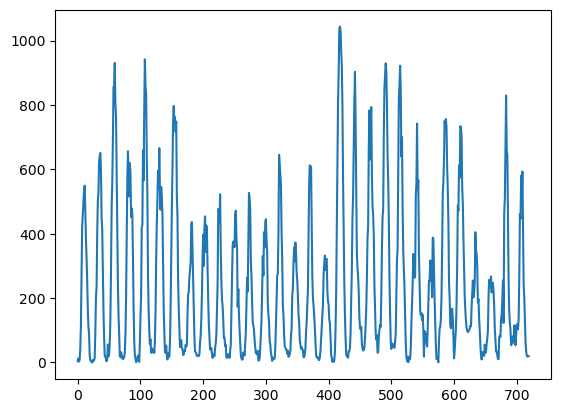

In [ ]:
df_pred_b.prediction.plot()

In [ ]:
df_pred_b_to_plot = df_pred_b['prediction']
df_pred_b_to_plot.set_index(df_pred_b['time'], inplace = True)

In [ ]:
df_pred_b_to_plot.plot()

# Prediction pour C

In [ ]:
# Reading csv to h2o dataframe file
df_train_c = h2o.H2OFrame(X_train_c)
df_test_c = h2o.H2OFrame(X_test_estimated_c)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Setting features as factor
df_train_c['dew_or_rime:idx'] = df_train_c['dew_or_rime:idx'].asfactor()
df_train_c['is_day:idx'] = df_train_c['is_day:idx'].asfactor()
df_train_c['is_in_shadow:idx'] = df_train_c['is_in_shadow:idx'].asfactor()
df_train_c['precip_type_5min:idx'] = df_train_c['precip_type_5min:idx'].asfactor()
df_train_c['snow_drift:idx'] = df_train_c['snow_drift:idx'].asfactor()

In [ ]:
df_test_c['dew_or_rime:idx'] = df_test_c['dew_or_rime:idx'].asfactor()
df_test_c['is_day:idx'] = df_test_c['is_day:idx'].asfactor()
df_test_c['is_in_shadow:idx'] = df_test_c['is_in_shadow:idx'].asfactor()
df_test_c['precip_type_5min:idx'] = df_test_c['precip_type_5min:idx'].asfactor()
df_test_c['snow_drift:idx'] = df_test_c['snow_drift:idx'].asfactor()

In [ ]:
# Removing labels from train set
y = "pv_measurement"
x = df_train_c.columns
x.remove(y)

In [ ]:
# Running fit/training on train set with cross validation n=5
aml = H2OAutoML(max_models = 10, seed = 1, sort_metric='MAE')
aml.train(x = x, y = y, training_frame = df_train_c)

AutoML progress: |
14:33:59.226: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]

██
14:34:53.80: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]


14:34:56.305: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]

██████
14:35:56.778: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]

███
14:36:27.931: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]

███
14:37:51.668: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]


14:38:17.828: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]

██
14:38:49.220: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]

█
14:39:24.930: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]

██
14:39:53.853: _train param, Dropping bad and constant columns: [snow_drift:idx, elevation:m]

███
14:41:43.6

key,value
Stacking strategy,cross_validation
Number of base models (used / total),7/10
# GBM base models (used / total),3/4
# XGBoost base models (used / total),3/3
# DRF base models (used / total),1/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [ ]:
lb = aml.leaderboard

In [ ]:
# Showing best perforimg models
lb.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_3_20231013_143359,49.4517,2445.47,20.2157,nan,2445.47
StackedEnsemble_BestOfFamily_1_AutoML_3_20231013_143359,49.7852,2478.57,20.4908,nan,2478.57
GBM_4_AutoML_3_20231013_143359,50.0604,2506.05,20.3921,nan,2506.05
GBM_3_AutoML_3_20231013_143359,50.4273,2542.91,20.6946,nan,2542.91
GBM_2_AutoML_3_20231013_143359,50.9945,2600.44,21.1176,nan,2600.44
DRF_1_AutoML_3_20231013_143359,51.367,2638.57,21.069,0.803061,2638.57
XRT_1_AutoML_3_20231013_143359,51.6421,2666.91,21.0775,0.801535,2666.91
GBM_1_AutoML_3_20231013_143359,53.1647,2826.48,22.0016,nan,2826.48
XGBoost_3_AutoML_3_20231013_143359,53.3664,2847.97,22.6101,nan,2847.97
XGBoost_1_AutoML_3_20231013_143359,54.6772,2989.6,22.356,nan,2989.6


In [ ]:
df_pred_c = aml.predict(df_test_c)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
df_pred_c = h2o.as_list(df_pred_c)

In [ ]:
df_pred_c['time'] = X_test_estimated_c.index
df_pred_c['location'] = ['C' for i in df_pred_c.index]
df_pred_c.reset_index(inplace = True)
df_pred_c = df_pred_c[['index', 'time', 'predict', 'location']]
df_pred_c.columns = ['id', 'time', 'prediction', 'location']
df_pred_c

df_pred_c['prediction'] = df_pred_c['prediction'].apply(lambda x: pos(x))

<Axes: >

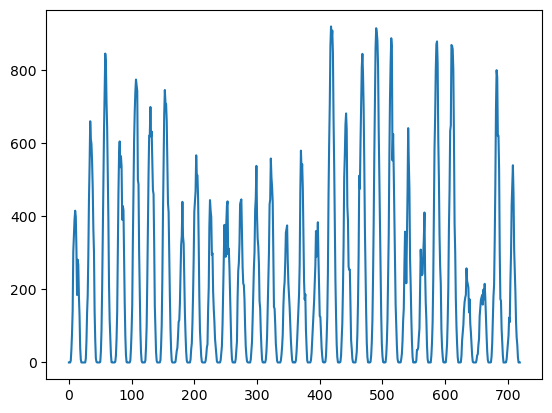

In [ ]:
df_pred_c.prediction.plot()

In [ ]:
df_pred_c

,id,time,prediction,location
0,0,2023-05-01 00:00:00,0.000000,C
1,1,2023-05-01 01:00:00,0.000000,C
2,2,2023-05-01 02:00:00,0.000000,C
3,3,2023-05-01 03:00:00,4.959303,C
4,4,2023-05-01 04:00:00,35.121101,C
...,...,...,...,...
715,715,2023-07-03 19:00:00,48.284091,C
716,716,2023-07-03 20:00:00,14.366757,C
717,717,2023-07-03 21:00:00,0.000000,C
718,718,2023-07-03 22:00:00,0.000000,C


# Gather the predictions

In [ ]:
df_pred_total = pd.concat([df_pred_a, df_pred_b, df_pred_c], axis = 0)
df_pred_final = pd.DataFrame({'id' : [i for i in range(2160)], 'prediction' : df_pred_total['prediction'].to_numpy()})
#df_pred_total
df_pred_final[0:1000]

,id,prediction
0,0,0.000000
1,1,0.000000
2,2,0.000000
3,3,45.240170
4,4,307.730949
...,...,...
995,995,473.915536
996,996,314.140514
997,997,265.527121
998,998,184.088674


In [ ]:
df_pred_final.to_csv('submission_23.csv', index=False)